<a href="https://colab.research.google.com/github/LaiTriMinh/project/blob/main/nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/khuon mat

/content/drive/MyDrive/khuon mat


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/khuon mat/train',target_size=(150,150), batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/khuon mat/test',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 180 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [4]:
training_set.class_indices
test_set.class_indices

{'Dương Duy Thoại': 0, 'Hùng Minh Trần Định': 1, 'Lại Trí Minh': 2}

In [5]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=100,verbose=1)

Epoch 1/100
6/6 [==============================] - 105s 15s/step - loss: 6.6587 - accuracy: 0.3444
Epoch 2/100
6/6 [==============================] - 4s 712ms/step - loss: 1.2101 - accuracy: 0.3111
Epoch 3/100
6/6 [==============================] - 4s 719ms/step - loss: 1.0606 - accuracy: 0.4500
Epoch 4/100
6/6 [==============================] - 4s 741ms/step - loss: 0.9328 - accuracy: 0.5833
Epoch 5/100
6/6 [==============================] - 4s 710ms/step - loss: 0.8629 - accuracy: 0.6278
Epoch 6/100
6/6 [==============================] - 4s 686ms/step - loss: 0.8201 - accuracy: 0.6056
Epoch 7/100
6/6 [==============================] - 4s 661ms/step - loss: 0.7666 - accuracy: 0.6278
Epoch 8/100
6/6 [==============================] - 4s 648ms/step - loss: 0.6916 - accuracy: 0.6778
Epoch 9/100
6/6 [==============================] - 4s 710ms/step - loss: 0.6362 - accuracy: 0.7389
Epoch 10/100
6/6 [==============================] - 4s 724ms/step - loss: 0.5448 - accuracy: 0.7611
Epoch 11/

In [7]:
model.save('khuonmat.h5')

In [8]:
model_khuonmat = load_model('khuonmat.h5')

In [9]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.003751629963517189
Train Accuracy 1.0


1/1 [==============================] - 0s 57ms/step
Đây là : Lại Trí Minh


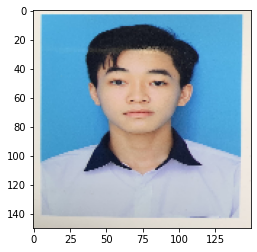

In [13]:
img = load_img('/content/laitriminh.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_khuonmat.predict(img)
class_khuonmat=['Dương Duy Thoại',
 'Hùng Minh Trần Định',
 'Lại Trí Minh']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_khuonmat[a])